Seaborn examples, taken from https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
# Turning on notebook plots -- just for use in jupyter notebooks.
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
#cruciale: seaborn va fatto 'partire'
sns.set()

<IPython.core.display.Javascript object>


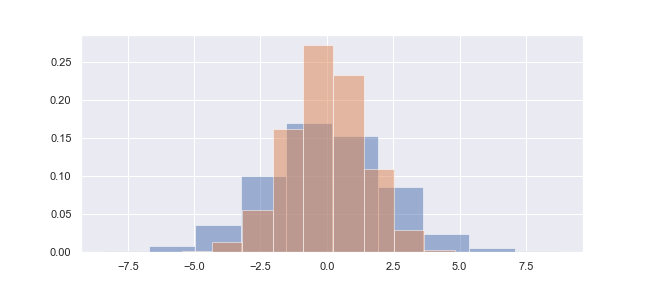

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


In [3]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)

<IPython.core.display.Javascript object>


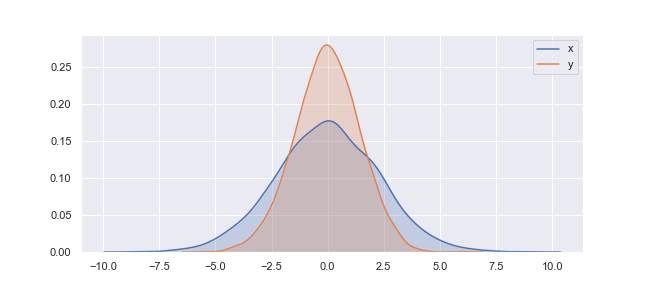

In [5]:
#con seaborn facciamo i density plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

<IPython.core.display.Javascript object>


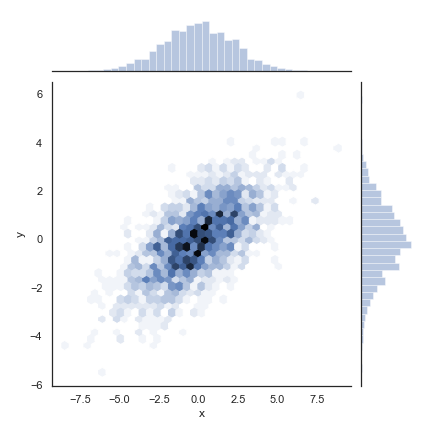

In [6]:
#fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>


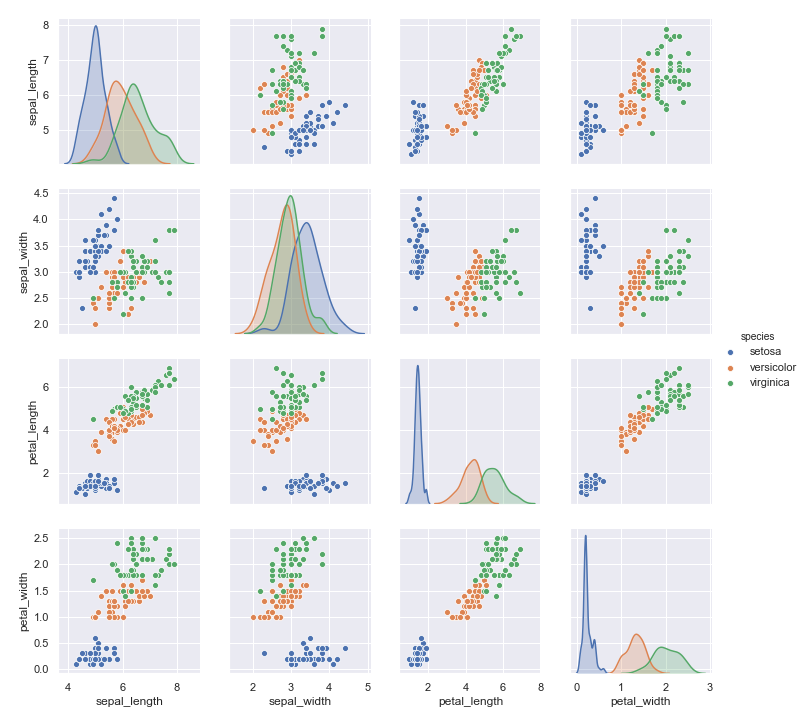

In [9]:
#tentativo di plottare relazioni tra le dimensioni del petalo e del sepalo
#di iris di tipo "setosa"
iris = sns.load_dataset("iris")
iris.head()
#questo incrocia tutte le categorie numeriche data la specie 'setosa'
sns.pairplot(iris, hue='species', size=2.5);

In [20]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<IPython.core.display.Javascript object>


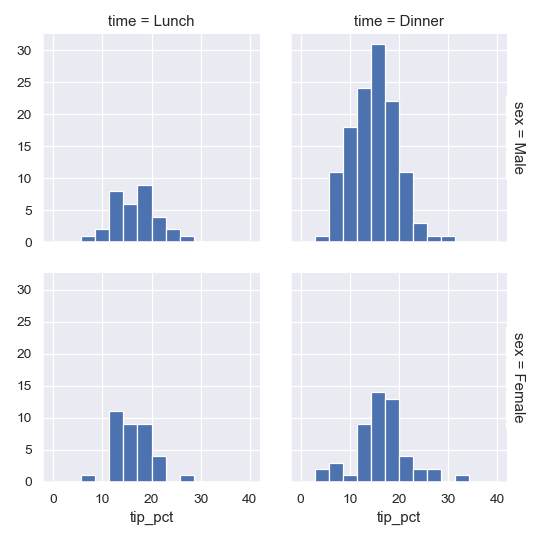

In [21]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


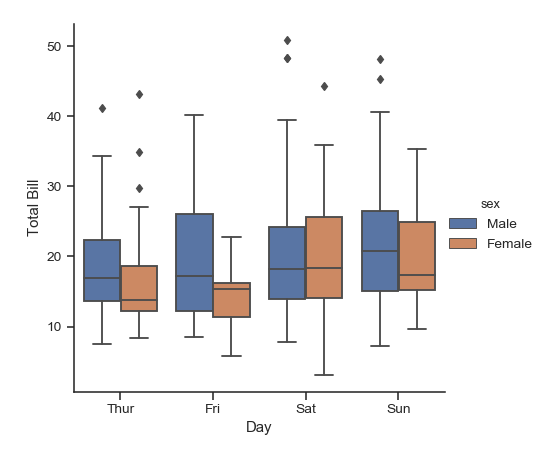

In [22]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

<IPython.core.display.Javascript object>


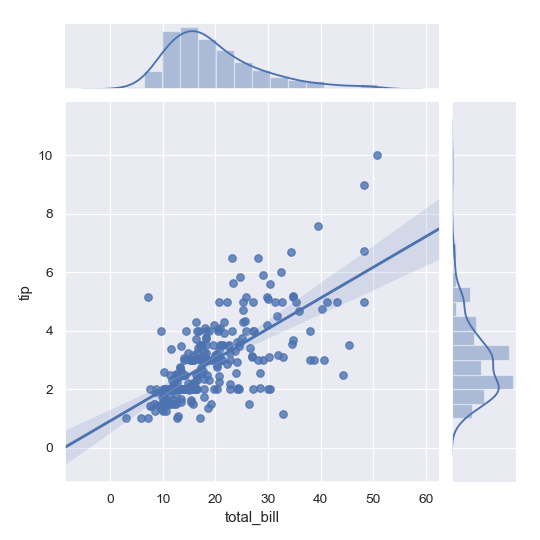

In [23]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg');

In [7]:
url = 'https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv'
data = pd.read_csv(url)
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59
